# 05.3 Redes Neuronales - Modelo MultiCapa

El __algoritmo de retropropagación que permite entrenar una red multicapa__ se introduce en 1970, pero no es hasta 1986 con el artículo de {cite:p}`rumelhart1986learning` cuando se aprecia su potencial

In [1]:
import pandas as pd
from IPython import display
import numpy as np

## Estructura general del modelo

### Proceso de activación

Se supone una red neuronal de $L$ capas, sin contar la capa de entrada. Se tendrían por tanto una capa de entrada, $L-1$ capas intermedias u ocultas y 1 de salida.

La activación de una capa intermedia $l$ con $l\ge L$ tiene la forma matricial

$$a^l = \sigma(w^l a^{l-1} + b^l)$$

Siendo $w^l$ la matriz de pesos que hace el sumatorio de la salida $a^{l-1}$ de la capa $l-1$ sobre $l$ y $b^l$ la matriz columna de sesgos o bias. La función $\sigma()$ es habitualmente la función sigmoidea, pero se pueden elegir otras como la tangente hiperbólica.

Si se llama $z^l = w^l a^{l-1} + b^l$ a la cantidad intermedia obtenida por aplicación del sumatorio. Y la activación de la capa $l$ queda

$$a^l = \sigma(z^l)$$

El sumatorio en la neurona $i$ de la capa $l$ es igual a

$$z^l_i = \displaystyle\sum_{j} w_{ij}^l a_j^{l-1} + b_i^l$$

Siendo $z_i^l$ la entrada promediada a la función de activación de la neurona $i$ de la capa $l$

La función de coste del error en la capa última $L$ es

$$ C = \frac{1}{2} \displaystyle\sum_{x} \|a^L - y\|^2 $$

<img src="images/RedMultiCapa.png" width="800px">

### La retropropagación

La __retropropagación__ (backpropagation en inglés) es comprender como cambiando los __pesos__ y __sesgos__ en la red cambia la función de __costes__, de manera que podamos iterativamente __optimizar la función de costes__. Implica calcular las derivadas parciales 

$$ \frac{\partial C}{\partial w_{jk}^l} ; \frac{\partial C}{\partial b_j^l}$$

Para entender este proceso se van a calcular las derivadas parciales sobre un modelo tricapa muy sencillo. 


<img src="images/RedTriCapa.png" width="600px">

En la primera capa las formulas del sumatorio y la activación son:

$$z^1_1=b^1_1 + w^1_{11}x_1 + w^1_{12}x_2$$
$$a^1_1 = f(z^1_1)$$

Y en la segunda capa

$$z^2_1=b^2_1 + w^2_{11}x_1 + w^2_{12}x_2$$
$$a^2_1 = f(z^2_1)$$

La función de coste para una observación $(x_1, x_2)$ de valor objetivo $y_1$ es

$$C = \frac{1}{2}(a^2_1 - y_1)^2$$

La tasa de variación del coste para uno de los pesos de la segunda capa, por ejemplo $w^2_{11}$, aplicando sucesivamente la regla de la cadena, es

$$\frac{\partial C}{\partial w^2_{11}}=\frac{\partial C}{\partial a^2_1}\frac{\partial a^2_1}{\partial z^2_1}\frac{\partial z^2_1}{\partial w^2_{11}}=(a^2_1 - y_1)f'(z^2_1)a^1_1$$

Donde se puede despejar la tasa de variación del coste con respecto a la unidad de activación $\delta$ :

$$\delta^2_{11}=\frac{1}{a^1_1} \frac{\partial C}{\partial w^2_{11}} = (a^2_1 - y_1)f'(z^2_1)$$

Siendo los indices en $\delta^l_{ij}$: $l$ la capa, $i$ el número de registros del conjunto de entrenamiento y $j$ el número de neuronas de la capa $l$. Matricialmente estos elementos dará lugar a $\Delta^l$

La tasa de variación del coste para uno de los pesos de la primera capa, por ejemplo $w^1_{11}$, aplicando sucesivamente la regla de la cadena, es

$$\frac{\partial C}{\partial w^1_{11}}=\frac{\partial C}{\partial a^2_1}\frac{\partial a^2_1}{\partial z^2_1}\frac{\partial z^2_1}{\partial a^1_1}\frac{\partial a^1_1}{\partial z^1_1}\frac{\partial z^1_1}{\partial w^1_{11}}=(a^2_1 - y_1)f'(z^2_1)w^2_{11}f'(z^1_1)x_1$$

Considerando el valor de $\delta^2_{11}$ se tiene

$$\frac{\partial C}{\partial w^1_{11}}=\delta^2_{11}w^2_{11}f'(z^1_1)x_1$$

Excluyendo el valor de $x_1$ se tiene $\delta^1_{11}$, y se pueden poner las ecuaciones que dan las tasas de variación por unidad de activación en las dos capas de las neuronas consideradas:

$$\delta^2_{11}=(a^2_1 - y_1)f'(z^2_1)$$
$$\delta^1_{11}=\delta^2_{11}w^2_{11}f'(z^1_1)$$

Si la capa de salida tuviera dos neuronas $y_1$ y $y_2$, habría que calcular un segundo delta $\delta^2_{12}$ con valor

$$\delta^2_{12}=(a^2_2 - y_2)f'(z^2_2)$$

Y $\delta^1_{11}$ sería composición de ambos:

$$\delta^1_{11}=(\delta^2_{11}w^2_{11}+\delta^2_{12}w^2_{21})f'(z^1_1)$$

En estas fórmulas se ve que el error se propaga desde la capa 2 a la 1 a través de los pesos de la 2. Este concepto da lugar al algoritmo de retropropagación que se detalla a continuación de forma matricial

### Aplicación del modelo al conjunto de entrenamiento X en bloque (proceso hacia Adelante o Forward)

__Para la capa $1\le l \le L$:__

$$A^l=\sigma((B^l)^T \oplus A^{l-1} \cdot (W^l)^T) = \sigma(Z^l) $$

Siendo $\cdot$ el producto normal de matrices y $\oplus$ una operación "_sobrecargada_" que suma cada uno de los bias de la matriz $B^1$ a una de las columnas de la otra matriz.

Si $l=1$ entonces $A^{l-1} = X$

### Coste del error cuadrático en la capa L

__El error simple en la capa L__ es

$$E=Y-A^L$$

__La tasa de variación del error cuadrático por unidad de activación en la capa L__ ($\Delta ^L$)

$$\Delta ^L = (Y-A^L) \odot \sigma ^{'} (Z^L)$$

### Retropropagación del error cuadrático en una capa $1 \ge l \gt L$

En la anterior ecuación se sustituye $Y-A^L$ por la propagación del $Delta$ existente en la capa $l+1$

$$\Delta ^l = (\Delta ^{l+1} \cdot W ^{l+1})  \odot \sigma ^{'} (Z^l)$$

Se empieza calculando $\Delta ^L$ y luego se va hacia atrás, desde $l=L-1$ hasta $1$ calculando $\Delta^l$, lo que se denomina __retropropagación__ del error cuadrático por unidad de activación

### El entrenamiento capa a capa queda

$$ W^l(t+1) = W^l(t) - \eta (\Delta ^l)^T \cdot A ^{l-1}$$

$$ B^l(t+1) = B^l(t) - \eta (\Delta ^l)^T \cdot {\large 1} $$

Siendo __1__ una matriz columna de $N$ __unos__ que realiza el sumatorio de las filas de $\Delta ^T$

__Además, si__ $l=1$

$$A ^{l-1}=X$$


La clase __NeuralNetwork__ donde se ha implementado una __maqueta__ con el código indicado se encuentra en el archivo __05.0_RNN_Redes_Neuronales_Utilidades.ipynb__

<span style='color:Red'> <font size="4"> <b>Información Complementaria:</b> El código de NeuralNetwork se incluye sólo a efectos de explicar mejor el algoritmo. Para las prácticas se utiliza sólo la librería sk-learn </font> </span>

In [2]:
run 05.0_Redes_Neuronales_Utilidades.ipynb

<Figure size 432x288 with 0 Axes>

## El Perceptron Multicapa de la librería sk-learn

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

El perceptrón multicapa está implementado en la librería sk-learn en la clase __MLPClassifier__ de __neural_network__

Los __parámetros de entrada__ más importantes son:

- __hidden_layer_sizes__ : Es una tupla con __la longitud de las capas ocultas__ (la longitud de la tupla será = n_layers - 2). Por defecto adopta el valor __(100,)__
- __activation__ : funciones de activación soportadas {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, por defecto se usa ’relu’. La identidad ($f(x)=x$) se utiliza para probar el cuello de botella en la compresión de las capas profundas. Las sucesivas capas profundas comprimen la información para quedarse con la parte relevante de la información que soporta la clasificación.
- __solver__ procedimiento de optimización {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’. __El procedimiento 'adam' funciona bastante bien en conjuntos de datos relativamente grandes__ (con miles de muestras de entrenamiento o más). Sin embargo, __para conjuntos de datos pequeños, 'lbfgs' puede converger más rápido y funcionar mejor__.
- __batch_size__ Tamaño de minilotes. Si 'lbfgs', el clasificador no usará minibatch.
- __learning_rate_init__ Ratio de aprendizaje, defecto=0.001

Algunos __parametros de salida__ a consultar:

- <b>best_loss_</b> : mínimo coste encontrado.
- <b>coefs_</b> y <b>intercepts_</b> : matrices de pesos y bias.
- <b>n_features_in_</b>, <b>n_layers_</b> y <b>n_outputs_</b> : nodos de entrada, número de capas y nodos de salida

Algunos __métodos__ de más uso:

- __fit(X, y)__ : Ajusta el modelo con las matrices __X__ e __y__.
- __get_params([deep])__ : Devuelve los parámetros del estimador
- __partial_fit(X, y[, classes])__ : actualiza el modelo con una iteración sencilla con los datos aportados
- __predict(X)__ : devuelve las etiquetas predichas __y__ a partir de una matriz de características __X__.
- __predict_log_proba(X)__ : da el logaritmo de probabilidades estimadas.
- __predict_proba(X)__ : da la estimación de etiquetas en probabilidades.
- __score(X, y[, sample_weight])__ : devuelve la exactitud (accuracy) de un conjunto de datos y etiquetas de prueba.
- __set_params(**params)__ : Establece los parámetros del estimador


### Observaciones

El método clásico de __descenso de gradiente__ necesita atravesar todos los datos de entrenamiento cada vez que se actualizan los parámetros del modelo. Cuando __N__ es muy grande, requiere enormes recursos de cálculo y tiempo de cálculo, lo que básicamente no es factible en el proceso real.

Para resolver este problema, el __descenso de gradiente estocástico (SGD)__ utiliza la pérdida de __una sola muestra__ de entrenamiento para aproximar la pérdida promedio.

El método __lbfgs__ usa un método quasi-Newton. Mientras el método de gradiente descenso, que sólo usa las derivadas primeras, los métodos de Newton son de segundo orden y usan las derivadas parciales segundas, pero tiene el inconveniente de ser muy costosos en proceso. Una alternativa son las aproximaciones __quasi-Newton__ como por ejemplo la fórmula de Broyden-Fletcher-Goldfarb-Shanno (BFGS).

Inicialmente, las redes neuronales solo tenían tres tipos de capas: ocultas, de entrada y de salida. Estas tres capas se conocen  como __capas densas__ porque cada neurona está completamente conectada a la siguiente capa. Y las neuronas son solo soportes, no hay conexiones directas. 

Las __redes neuronales modernas__ tienen muchos tipos de capas adicionales. Además de las capas densas clásicas, ahora también tenemos __capas de abandono__, __convolucionales__, de __agrupación__ y __recurrentes__. Las capas densas a menudo se entremezclan con estos otros tipos de capas.

<span style='color:Green'> <font size="4"> <b>Información Complementaria:</b> En el último cuaderno, sobre <b>redes convolucionales</b>, se explica con más detalle alguna de estas redes y la libreria <b>Pytorch</b> para trabajar con ellas </font> </span>

### Algunas observaciones al diseño del número de capas y neuronas del perceptron (*)

Poniendo el foco en las __capas densas__ hay que determinar dos parámetros: el __número de capas ocultas__ y el __número de neuronas__ por capa.

Los problemas que requieren más de dos capas ocultas son raros fuera del aprendizaje profundo. Dos o menos capas suelen ser suficientes en conjuntos de datos simples. Sin embargo, con conjuntos de datos complejos que involucran series de tiempo o visión por computadora, puede requerir capas adicionales. 

__El requisito de nº de capas ocultas__ puede ser:

- __Ninguna__: en problemas linealmente separables.
- __1__: aproxima cualquier función que contenga un mapeo continuo de un espacio finito a otro.
- __2__: puede representar un límite de decisión arbitrario con precisión arbitraria con funciones de activación racionales y puede aproximar cualquier mapeo suave con cualquier precisión.
- __>2__: las capas adicionales pueden aprender representaciones complejas (una especie de ingeniería de características automática).

__El número de neuronas en las capas ocultas__

El uso de muy __pocas neuronas__ en las capas ocultas dará como resultado el __underfitting__. El ajuste insuficiente ocurre cuando hay muy pocas neuronas en las capas ocultas para detectar adecuadamente las señales en un conjunto de datos complicado.

El uso de __demasiadas neuronas__ en las capas ocultas puede dar lugar a varios problemas. En primer lugar, demasiadas neuronas en las capas ocultas pueden provocar un sobreajuste (__overfitting__). El sobreajuste ocurre cuando la red neuronal tiene tanta capacidad de procesamiento de información que la cantidad limitada de información contenida en el conjunto de entrenamiento no es suficiente para entrenar todas las neuronas en las capas ocultas. Un segundo problema puede ocurrir incluso cuando los datos de entrenamiento son suficientes. Una cantidad excesivamente grande de neuronas en las capas ocultas puede __aumentar el tiempo de procesamiento__ hasta poder hacerlo inviable. 

Se suelen usar algunas reglas empíricas como empezar por una capa oculta con un número prefijado de neuronas y luego ir subiendo una a una este número hasta que se alcanza un máximo en el score. Después se puede probar a añadir una nueva capa oculta, prefijando su número de neuronas e ir subiendo este para ver como se comporta el score.

Las capas ocultas junto a la de salida suelen tener una estructura piramidal, de forma que la capa siguiente suele tener menor número de neuronas.

Cuando la capa de entrada tiene pocas neuronas se puede comenzar usando este número en la primera capa oculta e ir uno a uno subiendo su número.

Heaton por ejemplo indica las siguientes reglas empíricas para __determinar las neuronas de las capas ocultas__:

- El número de neuronas ocultas debe estar __entre el tamaño de la capa de entrada y el tamaño de la capa de salida__.
- El número de neuronas ocultas debe ser __2/3 del tamaño de la capa de entrada, más el tamaño de la capa de salida__.
- El número de neuronas ocultas debe ser __inferior al doble del tamaño de la capa de entrada__.

(*) {cite:p}`heaton2008introduction`

(*) {cite:p}`heaton2017early`

## Puerta XOR

In [21]:
cols = ['x1', 'x2', 'XOR']
puerta_xor=[[0,0,0], [1,0,1], [0,1,1], [1,1,0]]
df = pd.DataFrame(puerta_xor, columns=cols)
df.head()

x1  x2  XOR
0   0   0    0
1   1   0    1
2   0   1    1
3   1   1    0

In [61]:
X = []
y = []
for ix in np.linspace(0, 1, 20):
    for iy in np.linspace(0, 1, 20):
        if (ix <= 0.5 and iy <= 0.5) or (ix>0.5 and iy >0.5):
            y.append(0)
        else:
            y.append(1)
        X.append([ix, iy])
y=np.asarray(y)
X=np.asarray(X)

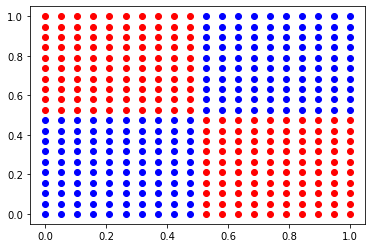

In [62]:
color=['blue', 'red']
for lbl in np.unique(y):
    plt.scatter(X[y==lbl][:,0], X[y==lbl][:,1], c=color[lbl])

In [63]:
## Importación de la clase del perceptrón multicapa
from sklearn.neural_network import MLPClassifier
## Inicialización y creación del objeto clasificador
mlp = MLPClassifier(max_iter=200,activation = 'tanh',solver='lbfgs',random_state=1, hidden_layer_sizes=(4,2)) 
mlp.fit(X, y)
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(mlp.score(X, y)))

Exactitud del conjunto de entrenamiento: 1.000


In [64]:
mlp.n_features_in_, mlp.hidden_layer_sizes, mlp.n_outputs_, "Total de capas=", mlp.n_layers_

(2, (4, 2), 1, 'Total de capas=', 4)

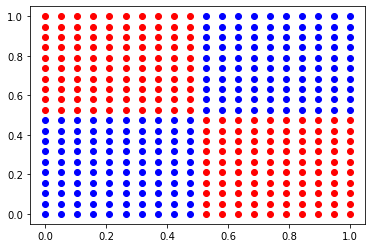

In [65]:
color=['blue', 'red']
y_pred = mlp.predict(X)
for lbl in np.unique(y_pred):
    plt.scatter(X[y_pred==lbl][:,0], X[y_pred==lbl][:,1], c=color[lbl])

Epoca =====> 1 Coste ====> 0.2500977942609019
Epoca =====> 5001 Coste ====> 0.13607151164272036
Epoca =====> 10001 Coste ====> 0.02333540742770669
Epoca =====> 15001 Coste ====> 0.012173614925513632
Epoca =====> 20001 Coste ====> 0.00860618824229476
Epoca =====> 25001 Coste ====> 0.006911612597868486
Epoca =====> 30001 Coste ====> 0.005845883319820078
Epoca =====> 35001 Coste ====> 0.005059220105951984
Epoca =====> 40000 Coste ====> 0.004434195276895699
Exactitud - Accuracy= 0.74


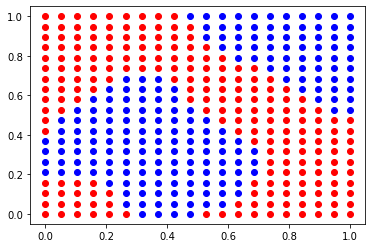

In [9]:
from sklearn.metrics import accuracy_score
nn = NeuralNetwork(eta=0.01, epocas=40000, hiddenLayers=[50], seed=1, activacion='logistic')
nn.fit(X, y),
y_pred= nn.predict(X)
print("Exactitud - Accuracy=", accuracy_score(y_true=y, y_pred=y_pred))
color=['blue', 'red']
for lbl in np.unique(y_pred):
    plt.scatter(X[y_pred==lbl][:,0], X[y_pred==lbl][:,1], c=color[lbl])

## Clasificar con la red neuronal el conjunto Iris 

In [10]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### Se toma el conjunto completo como conjunto de entrenamiento.

__Se toman las 4 características__

In [11]:
from sklearn.model_selection import train_test_split
X = df.values[:,0:4]
y = df.values[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

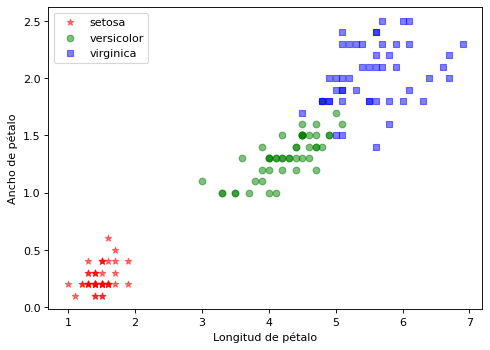

In [12]:
import matplotlib.pyplot as plt
clases = iris['target_names']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y==i,2], X[y==i,3], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

### Clasificación con MLPClassifier

In [13]:
## Importación de la clase del perceptrón multicapa
from sklearn.neural_network import MLPClassifier
## Inicialización y creación del objeto clasificador
mlp = MLPClassifier(max_iter=5000,activation = 'logistic',solver='lbfgs',random_state=1, hidden_layer_sizes=(5,4)) 
mlp.fit(X_train, y_train)
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(mlp.score(X_train, y_train)))
print("Exactitud del conjunto de prueba: {:.3f}".format(mlp.score(X_test, y_test)))

Exactitud del conjunto de entrenamiento: 1.000
Exactitud del conjunto de prueba: 0.967


In [14]:
mlp.n_features_in_, mlp.n_layers_, mlp.n_outputs_

(4, 4, 3)

__Visualización de la calidad de la clasificación__

Los colores indican la estimación y las marcas gráficas el valor real

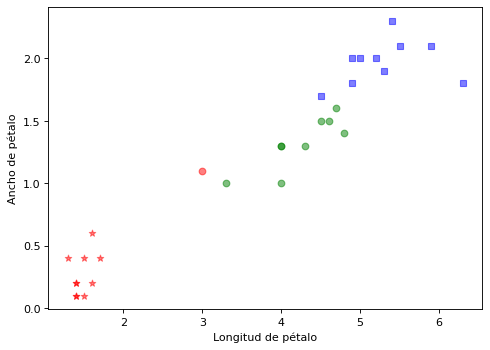

In [15]:
#Xplot=X_train
Xplot=X_test
#yplot=y_train
yplot=y_test
yplot_pred = mlp.predict(Xplot)
import matplotlib.pyplot as plt
marcas = ['*', 'o', 's']
clases=iris['target_names']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(Xplot)):
    estimado = yplot_pred[i]
    ik = int(estimado)
    ic = int(yplot[i])
    plt.scatter(Xplot[i,2], Xplot[i,3], c=color[ik], alpha=0.5, marker=marcas[ic])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.show()

## Estructura tridimensional de proteinas (AlphaFold)

- {cite:p}`senior2019protein`.

El procedimiento seguido ha resultado __paradigmático__ en este tipo de metodologías:

<img src="images/alphafold.png" width="600px">

Es posible acceder a un cuaderno Jupyter en Google Colaboratory donde predecir en la red AlphaFold creandose una copia del cuaderno en el Drive de cada usuario desde el enlace:

https://colab.sandbox.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb

## Artículos para profundizar

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3507700/#B15
- http://science.sciencemag.org/content/313/5786/504
- https://www.tandfonline.com/doi/full/10.1080/13102818.2017.1364977
- A.K.Jain & J. Mao. Artificial Neural Networks: A IEEE, March (1996)
- Anders Krogh. What are artificial neural networks? Nat. Biotech., 26 , 2 2008
- Senior et al. Protein structure prediction using multiple Deep neural networks in the 13th CASP13. Proteins , 87:1141 1148 (2019)
- Wang, L., J. Chen and M. Marathe . TDEFSI: Theory Guided Deep Learning Based Epidemic Forecasting with Synthetic Information . arXiv:2002.04663v1 [ stat.OT ] 28 Jan 2020